*Partiel* Regression

## Exercice 1 

In [62]:
#Importation des bib 
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from scipy import stats

In [63]:
#Data
data = {"Revenu": [8000, 9000, 9500, 9500, 9800, 11000, 12000, 13000, 15000, 16000],
        "Consommation": [7389.99, 8169.65, 8831.71, 8652.84, 8788.08, 9616.21, 10593.45, 11186.11, 12758.09, 13869.62]}
df = pd.DataFrame(data)

Question1

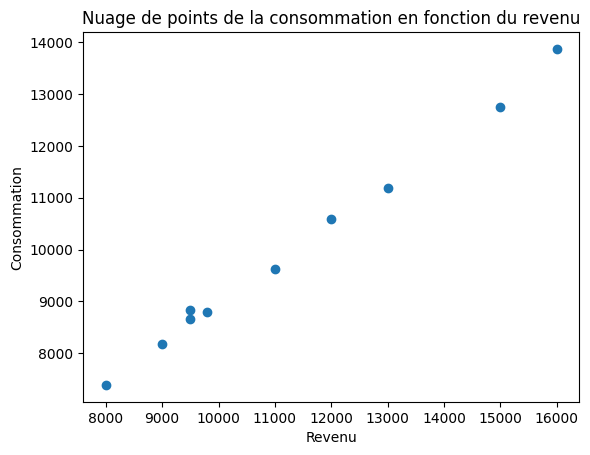

In [ ]:
#Tracer le nuage de points
plt.scatter(df["Revenu"], df["Consommation"])
plt.xlabel("Revenu")
plt.ylabel("Consommation")
plt.title("Nuage de points de la consommation en fonction du revenu")
plt.show()


Le nuage de points montre une relation positive entre le revenu et la consommation. Plus le revenu augmente, plus la consommation augmente.

Question 2: 

In [ ]:
import statsmodels.api as sm

#Définir la variable endogène (consommation) et la variable exogène (revenu)
y = df["Consommation"]
X = df["Revenu"]

#Ajouter une constante à la variable exogène pour estimer le terme constant
X = sm.add_constant(X)

#Estimer le modèle de régression linéaire par la méthode des MCO
model = sm.OLS(y, X)
results = model.fit()

#Afficher les résultats
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Consommation   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1895.
Date:                Wed, 24 May 2023   Prob (F-statistic):           8.55e-11
Time:                        07:22:44   Log-Likelihood:                -62.750
No. Observations:                  10   AIC:                             129.5
Df Residuals:                       8   BIC:                             130.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1176.0896    207.392      5.671      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


la consommation autonome est estimé 1176.0896 euros et la propension marginale à consommer est estimée à 0.7810

Question 3 :

C"_t = 1176.0896 + Revenu * 0.7810

question 4

In [ ]:
df["Residus"] = results.resid
print("La moyenne des résidus est :", df["Residus"].mean())

La moyenne des résidus est : -6.366462912410497e-13


Question 5 

In [ ]:
n = len(df) 
k = len(results.params) 
sigma2 = results.ssr / (n - k) 
print("L'estimateur de la variance de l'erreur est :", sigma2)

L'estimateur de la variance de l'erreur est : 20646.172818614796


question 6

In [ ]:
t_stat = results.tvalues["Revenu"] # Statistique de test t pour le coefficient du revenu
p_value = results.pvalues["Revenu"] # P-valeur associée au test t pour le coefficient du revenu
print("La statistique de test t pour la pente est :", t_stat)
print("La p-valeur associée au test t pour la pente est :", p_value)
if p_value < 0.05:
    print("On rejette l'hypothèse nulle que la pente est nulle au seuil de 5 %.")
else:
    print("On ne peut pas rejeter l'hypothèse nulle que la pente est nulle au seuil de 5 %.")

La statistique de test t pour la pente est : 43.53517544822133
La p-valeur associée au test t pour la pente est : 8.54889559360952e-11
On rejette l'hypothèse nulle que la pente est nulle au seuil de 5 %.


question 7

In [ ]:
beta_hat = results.params["Revenu"] # Estimation du paramètre β
se_beta_hat = results.bse["Revenu"] # Erreur standard de l'estimation du paramètre β
alpha = 0.05 # Niveau de significativité
t_crit = stats.t.ppf(1 - alpha/2, n - k) # Valeur critique du test t à deux queues avec n - k degrés de liberté
ic_inf = beta_hat - t_crit * se_beta_hat # Borne inférieure de l'intervalle de confiance
ic_sup = beta_hat + t_crit * se_beta_hat # Borne supérieure de l'intervalle de confiance
print("L'intervalle de confiance au niveau de confiance de 95 % pour le paramètre β est : [", ic_inf, ";", ic_sup, "]")

L'intervalle de confiance au niveau de confiance de 95 % pour le paramètre β est : [ 0.7396150598293871 ; 0.8223504305378431 ]


question 8

In [ ]:
r_squared = results.rsquared # Coefficient de détermination R²
f_stat = results.fvalue # Statistique de test F pour le modèle global
p_value_f = results.f_pvalue # P-valeur associée au test F pour le modèle global
print("Le coefficient de détermination R² est :", r_squared)
print("La statistique de test F pour le modèle global est :", f_stat)
print("La p-valeur associée au test F pour le modèle global est :", p_value_f)
if p_value_f < 0.05:
    print("On rejette l'hypothèse nulle que le modèle n'a pas d'intérêt explicatif au seuil de 5 %.")
else:
    print("On ne peut pas rejeter l'hypothèse nulle que le modèle n'a pas d'intérêt explicatif au seuil de 5 %.")

Le coefficient de détermination R² est : 0.9957967994232659
La statistique de test F pour le modèle global est : 1895.3115013074123
La p-valeur associée au test F pour le modèle global est : 8.548895593609554e-11
On rejette l'hypothèse nulle que le modèle n'a pas d'intérêt explicatif au seuil de 5 %.


Question 9 :

In [ ]:
# Définir la variable endogène (consommation) et la variable exogène (revenu)
y = df["Consommation"]
X = df["Revenu"]

#Ajouter une constante à la variable exogène pour estimer le terme constant
X = sm.add_constant(X)

#Estimer le modèle de régression linéaire par la méthode des MCO
model = sm.OLS(y, X)
results = model.fit()

#Calculer les valeurs estimées de la consommation et les résidus
df["Consommation_estimee"] = results.predict(X)
df["Residus"] = results.resid

#Calculer la moyenne de la consommation
C_mean = df["Consommation"].mean()

#Calculer les sommes des carrés totale, expliquée et des résidus
SCT = np.sum((df["Consommation"] - C_mean)**2)
SCR = np.sum((df["Consommation_estimee"] - C_mean)**2)
SCE = np.sum(df["Residus"]**2)

#Vérifier l'équation d'analyse de la variance
print("SCT =", SCT)
print("SCR =", SCR)
print("SCE =", SCE)
print("SCT - SCR - SCE =", SCT - SCR - SCE)

SCT = 39296098.18365002
SCR = 39130928.80110109
SCE = 165169.38254891834
SCT - SCR - SCE = 9.924406185746193e-09


Ces résultats confirment l’équation d’analyse de la variance :
SCT=SCR+SCE
On peut voir que la somme des carrés expliquée par la régression (SCR) est très proche de la somme des carrés totale (SCT), ce qui signifie que le modèle explique presque toute la variation de la consommation. La somme des carrés des résidus (SCE) est très faible, ce qui signifie que les erreurs de prédiction sont très petites.

EXERCICE N 2 

Partie A

In [ ]:
#Bibliotheque
from scipy.stats import f
import numpy as np

In [51]:
#DATA
Y = np.array([1, 4, 1, 3, 2, 4])
X1 = np.array([1, 8, 3, 5, 6, 10])
X2 = np.array([2, 8, 1, 7, 4, 6])

Question 1

In [56]:
X = np.column_stack((np.ones(len(Y)), X1, X2))
Y = Y.reshape(-1, 1)
# Dimensions des vecteurs et des matrices
print(f"Dimensions de Y : {Y.shape}")
print(f"Dimensions de X : {X.shape}")


Dimensions de Y : (6, 1)
Dimensions de X : (6, 3)


Question 2

In [57]:
model = sm.OLS(Y, X)
results = model.fit()
beta = results.params
print("Paramètres du modèle :", beta)

Paramètres du modèle : [0.06397188 0.20492091 0.28049209]


Question 3

In [58]:
residus = results.resid
variance_erreurs = np.var(residus)
print("Estimation de la variance des erreurs :", variance_erreurs)

Estimation de la variance des erreurs : 0.04171060339777388


Question 4

In [59]:
R2 = results.rsquared
RMSE = np.sqrt(np.mean(residus**2))
print("Coefficient de détermination multiple R2 :", R2)
print("Erreur RMSE :", RMSE)

Coefficient de détermination multiple R2 : 0.9736564610119323
Erreur RMSE : 0.2042317394475547


Question 5

In [60]:
n = len(Y)
k = X.shape[1] - 1
R2_ajuste = 1 - (1 - R2) * ((n - 1) / (n - k - 1))
print("R2 ajusté :", R2_ajuste)

R2 ajusté : 0.9560941016865537


Partie B

Question 1 

In [ ]:
p_values = results.pvalues[1:]
if all(p < 0.05 for p in p_values):
    print("Les variables explicatives X1 et X2 sont significativement contributives pour expliquer Yt.")
else:
    print("Les variables explicatives X1 et X2 ne sont pas significativement contributives pour expliquer Yt.")

Les variables explicatives X1 et X2 sont significativement contributives pour expliquer Yt.


Question 2

In [ ]:
f_stat = (R2 / k) / ((1 - R2) / (n - k - 1))
p_value_f = 1 - f.cdf(f_stat, k, n - k - 1)
if p_value_f < 0.05:
    print("Le modèle de régression multivariée est significatif.")
else:
    print("Le modèle de régression multivariée n'est pas significatif.")

Le modèle de régression multivariée est significatif.


Question 3


In [46]:
X_n = np.array([1, 2, 8])
Y_n = np.dot(X_new, beta)
print("La valeur de Yt pour X1=2 et X2=8 est :", Y_n)

La valeur de Yt pour X1=2 et X2=8 est : 2.717750439367311


Question 4

Pour améliorer le modèle de régression, voici quelques idées :

Ajouter d'autres variables explicatives 

Vérifier les hypothèses des moindres carrés ordinaires (MCO) 

Évaluer l'ajustement du modèle : Utilisez  le coefficient de détermination (R²) ou l'erreur quadratique moyenne (RMSE) 

